In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/20.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/6.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/5_processed (3).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/7_processed (1).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/7_processed (2).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/4_processed(3).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/5.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/8.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/9_processed (2).jpg
/kaggle/input/fabric-defect-da

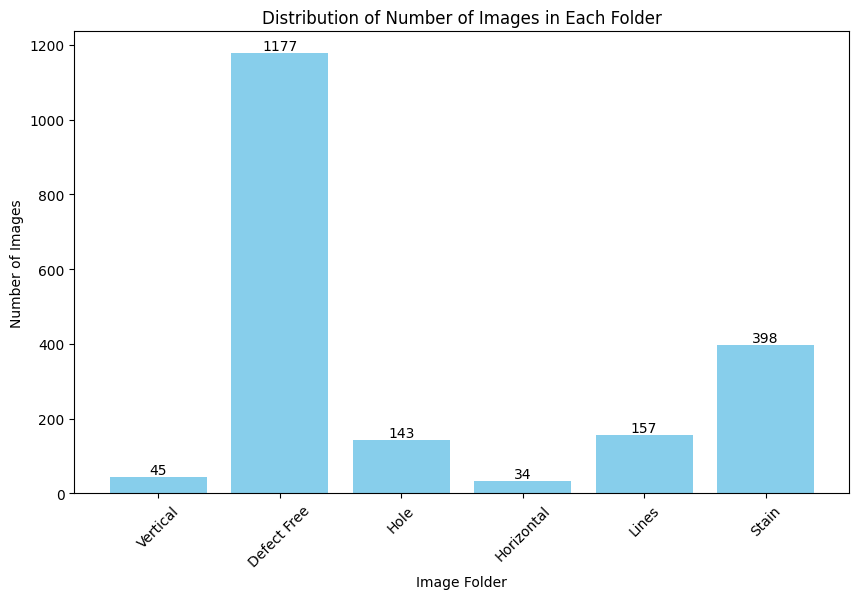

In [2]:
import os
import matplotlib.pyplot as plt

# Define the image folders
image_folders = {
    'Vertical': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical',
    'Defect Free': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/defect free',
    'Hole': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/hole',
    'Horizontal': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/horizontal',
    'Lines': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/lines',
    'Stain': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/stain'
}

# Function to count the number of images in a folder
def count_images_in_folder(folder_path):
    if not os.path.exists(folder_path):  # Check if folder exists
        print(f"⚠ Warning: Folder '{folder_path}' not found.")
        return 0
    return len([file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Get the number of images in each folder
image_counts = [count_images_in_folder(folder) for folder in image_folders.values()]

# Plot the distribution of the number of images inside each folder
plt.figure(figsize=(10, 6))
bars = plt.bar(image_folders.keys(), image_counts, color='skyblue')

plt.xlabel('Image Folder')
plt.ylabel('Number of Images')
plt.title('Distribution of Number of Images in Each Folder')
plt.xticks(rotation=45)

# Add text labels with the exact number of images above each bar
for bar, count in zip(bars, image_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom', fontsize=10)

plt.show()


In [3]:
import shutil

def delete_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' and its contents have been deleted successfully.")
    except OSError as e:
        print(f"Error: {e}")

In [4]:
folders = ['/kaggle/working/Vertical_augmented/', 
            '/kaggle/working/defect free_augmented/', 
            '/kaggle/working/hole_augmented/', 
            '/kaggle/working/horizontal_augmented/', 
            '/kaggle/working/lines_augmented/',
             '/kaggle/working/stain_augmented/' ]

for folder in folders:
    delete_folder(folder)

Error: [Errno 2] No such file or directory: '/kaggle/working/Vertical_augmented/'
Error: [Errno 2] No such file or directory: '/kaggle/working/defect free_augmented/'
Error: [Errno 2] No such file or directory: '/kaggle/working/hole_augmented/'
Error: [Errno 2] No such file or directory: '/kaggle/working/horizontal_augmented/'
Error: [Errno 2] No such file or directory: '/kaggle/working/lines_augmented/'
Error: [Errno 2] No such file or directory: '/kaggle/working/stain_augmented/'


In [5]:
!pip install -U albumentations  # If running in Jupyter Notebook or Kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.6/290.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [6]:
# import os
# import cv2
# from PIL import Image
# import albumentations as A
# import numpy as np
# from multiprocessing import Pool, cpu_count

# def augment_image(args):
#     input_folder, output_folder, filename, num_augmentations, augmentations = args
#     image_path = os.path.join(input_folder, filename)
    
#     # Open and resize image for faster processing (adjust size if needed)
#     image = Image.open(image_path).convert("RGB")
#     image = image.resize((512, 512))  # Reduce size for efficiency
#     image_np = np.array(image)

#     for i in range(num_augmentations):
#         augmented_image = augmentations(image=image_np)['image']
#         new_image_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_{i+1}.png")
        
#         # Save using OpenCV for better speed
#         cv2.imwrite(new_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

# def augment_images_parallel(input_folder, output_folder, num_augmentations):
#     os.makedirs(output_folder, exist_ok=True)
    
#     image_files = [filename for filename in os.listdir(input_folder) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
#     # Define faster augmentations
#     augmentations = A.Compose([
#         A.HorizontalFlip(p=0.5),
#         A.VerticalFlip(p=0.5),
#         A.RandomRotate90(p=0.5),
#         A.Rotate(limit=180, interpolation=cv2.INTER_LINEAR, border_mode=cv2.BORDER_REFLECT, p=0.75),  # Faster interpolation
#         A.RandomBrightnessContrast(p=0.5),
#         A.GaussNoise(p=0.25),
#         A.Blur(blur_limit=3, p=0.3),  # Simpler blur instead of AdvancedBlur
#     ])
    
#     # Prepare arguments for multiprocessing
#     args_list = [(input_folder, output_folder, filename, num_augmentations, augmentations) for filename in image_files]

#     # Use multiprocessing for faster execution
#     with Pool(processes=cpu_count()) as pool:
#         pool.map(augment_image, args_list)

# # Define dataset paths
# input_folders = {
#     'vertical': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical',
#     'defect': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/defect free',
#     'hole': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/hole',
#     'horizontal': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/horizontal',
#     'lines': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/lines',
#     'stain': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/stain',
# }

# output_folders = {
#     'vertical': '/kaggle/working/vertical_augmented/',
#     'defect': '/kaggle/working/defect_augmented/',
#     'hole': '/kaggle/working/hole_augmented/',
#     'horizontal': '/kaggle/working/horizontal_augmented/',
#     'lines': '/kaggle/working/lines_augmented/',
#     'stain': '/kaggle/working/stain_augmented/',
# }

# num_augmentations = {
#     'vertical': 5,
#     'defect': 6,
#     'hole': 6,
#     'horizontal': 8,
#     'lines': 8,
#     'stain': 8
# }

# # Perform augmentation in parallel
# for category, input_folder in input_folders.items():
#     augment_images_parallel(input_folder, output_folders[category], num_augmentations[category])


In [7]:
# import os
# import matplotlib.pyplot as plt

# # Define the image folders
# image_folders = {
#     'vertical': '/kaggle/working/vertical_augmented/',
#     'defect': '/kaggle/working/defect_augmented/',
#     'hole': '/kaggle/working/hole_augmented/',
#     'horizontal': '/kaggle/working/horizontal_augmented/',
#     'lines': '/kaggle/working/lines_augmented/',
#     'stain': '/kaggle/working/stain_augmented/',
# }

# # Function to count the number of images in a folder
# def count_images_in_folder(folder_path):
#     if not os.path.exists(folder_path):  # Check if folder exists
#         print(f"⚠ Warning: Folder '{folder_path}' not found.")
#         return 0
#     return len([file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])

# # Get the number of images in each folder
# image_counts = [count_images_in_folder(folder) for folder in image_folders.values()]

# # Plot the distribution of the number of images inside each folder
# plt.figure(figsize=(10, 6))
# bars = plt.bar(image_folders.keys(), image_counts, color='skyblue')

# plt.xlabel('Image Folder')
# plt.ylabel('Number of Images')
# plt.title('Distribution of Number of Images in Each Folder')
# plt.xticks(rotation=45)

# # Add text labels with the exact number of images above each bar
# for bar, count in zip(bars, image_counts):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom', fontsize=10)

# plt.show()


In [8]:
# import os
# import random
# import matplotlib.pyplot as plt

# def display_random_images(folder_path, num_images=4, rows=1, cols=4):
#     image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]  # Filter valid image files
    
#     if len(image_files) == 0:
#         print(f"No images found in {folder_path}")
#         return  # Skip this folder if no images are found

#     num_images = min(num_images, len(image_files))  # Ensure we don't sample more than available images
#     random_images = random.sample(image_files, num_images)

#     plt.figure(figsize=(12, 6))
#     for i, image_file in enumerate(random_images):
#         image_path = os.path.join(folder_path, image_file)
#         image = plt.imread(image_path)

#         plt.subplot(rows, cols, i+1)
#         plt.imshow(image)
#         plt.title(image_file, fontsize=8)
#         plt.axis('off')

#     plt.tight_layout()
#     plt.show()

# folders = [
#     '/kaggle/working/vertical_augmented/',
#     '/kaggle/working/defect_augmented/',
#     '/kaggle/working/hole_augmented/',
#     '/kaggle/working/horizontal_augmented/',
#     '/kaggle/working/lines_augmented/',
#     '/kaggle/working/stain_augmented/',
# ]

# for folder in folders:
#     display_random_images(folder)


{'train': {'vertical': 472, 'defect': 6591, 'hole': 1501, 'horizontal': 452, 'lines': 1648, 'stain': 3900}, 'val': {'vertical': 135, 'defect': 1883, 'hole': 429, 'horizontal': 129, 'lines': 471, 'stain': 1114}, 'test': {'vertical': 68, 'defect': 942, 'hole': 215, 'horizontal': 65, 'lines': 236, 'stain': 558}}


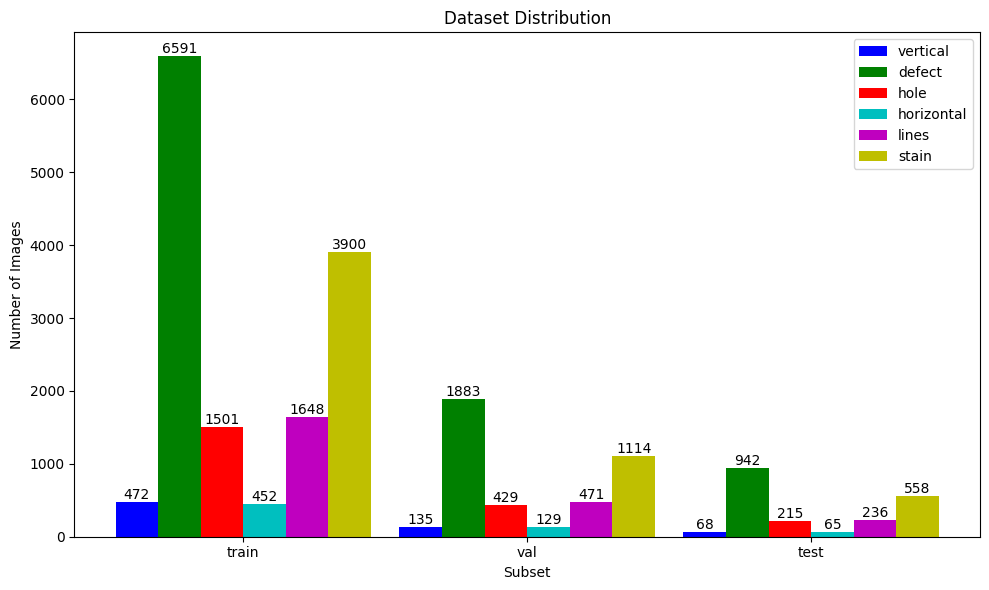

In [9]:
import os
import cv2
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import albumentations as A
from multiprocessing import Pool, cpu_count

def augment_image(args):
    input_folder, output_folder, filename, num_augmentations, augmentations = args
    image_path = os.path.join(input_folder, filename)
    image = Image.open(image_path).convert("RGB").resize((512, 512))
    image_np = np.array(image)
    
    for i in range(num_augmentations):
        augmented_image = augmentations(image=image_np)['image']
        new_image_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_{i+1}.png")
        cv2.imwrite(new_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

def augment_images_parallel(input_folder, output_folder, num_augmentations):
    os.makedirs(output_folder, exist_ok=True)
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    augmentations = A.Compose([
        A.HorizontalFlip(p=0.5), A.VerticalFlip(p=0.5), A.RandomRotate90(p=0.5),
        A.Rotate(limit=180, interpolation=cv2.INTER_LINEAR, border_mode=cv2.BORDER_REFLECT, p=0.75),
        A.RandomBrightnessContrast(p=0.5), A.GaussNoise(p=0.25), A.Blur(blur_limit=3, p=0.3)
    ])
    
    args_list = [(input_folder, output_folder, f, num_augmentations, augmentations) for f in image_files]
    with Pool(cpu_count()) as pool:
        pool.map(augment_image, args_list)

def split_dataset(input_folder, output_folder, class_name, split_proportions=[0.7, 0.2, 0.1]):
    image_files = os.listdir(input_folder)
    random.shuffle(image_files)
    
    num_train = int(len(image_files) * split_proportions[0])
    num_valid = int(len(image_files) * split_proportions[1])
    train_files, valid_files, test_files = image_files[:num_train], image_files[num_train:num_train + num_valid], image_files[num_train + num_valid:]
    
    for subset, subset_folder in zip([train_files, valid_files, test_files], ['train', 'val', 'test']):
        class_folder = os.path.join(output_folder, subset_folder, class_name)
        os.makedirs(class_folder, exist_ok=True)
        for image_file in subset:
            shutil.copy(os.path.join(input_folder, image_file), os.path.join(class_folder, image_file))

def count_images_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if f.endswith('.png')])

def plot_bar_chart(image_counts, class_names):
    subsets = list(image_counts.keys())
    colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Added 'y' (yellow) to handle 6 categories
    
    plt.figure(figsize=(10, 6))
    bar_width = 0.15
    index = range(len(subsets))
    
    for i, class_name in enumerate(class_names):
        counts = [image_counts[subset][class_name] for subset in subsets]
        bars = plt.bar([ind + i * bar_width for ind in index], counts, width=bar_width, color=colors[i], label=class_name)
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
    
    plt.xlabel('Subset')
    plt.ylabel('Number of Images')
    plt.title('Dataset Distribution')
    plt.xticks([ind + bar_width * (len(class_names) - 1) / 2 for ind in index], subsets)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Dataset Directories
input_folders = {
   'vertical': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical',
    'defect': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/defect free',
    'hole': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/hole',
    'horizontal': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/horizontal',
    'lines': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/lines',
    'stain': '/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/stain',
}
output_folder = '/kaggle/working/dataset/'
num_augmentations = {'vertical': 15, 'defect': 8, 'hole': 15, 'horizontal': 19, 'lines': 15, 'stain': 14}

# Step 1: Augment and Split Dataset
for category, input_folder in input_folders.items():
    output_augmented = f"/kaggle/working/{category}_augmented/"
    augment_images_parallel(input_folder, output_augmented, num_augmentations[category])
    split_dataset(output_augmented, output_folder, category)

# Step 2: Count Images
image_counts = {subset: {class_name: count_images_in_folder(os.path.join(output_folder, subset, class_name)) for class_name in input_folders.keys()} for subset in ['train', 'val', 'test']}

print(image_counts)

# Step 3: Visualize Data Distribution
plot_bar_chart(image_counts, input_folders.keys())


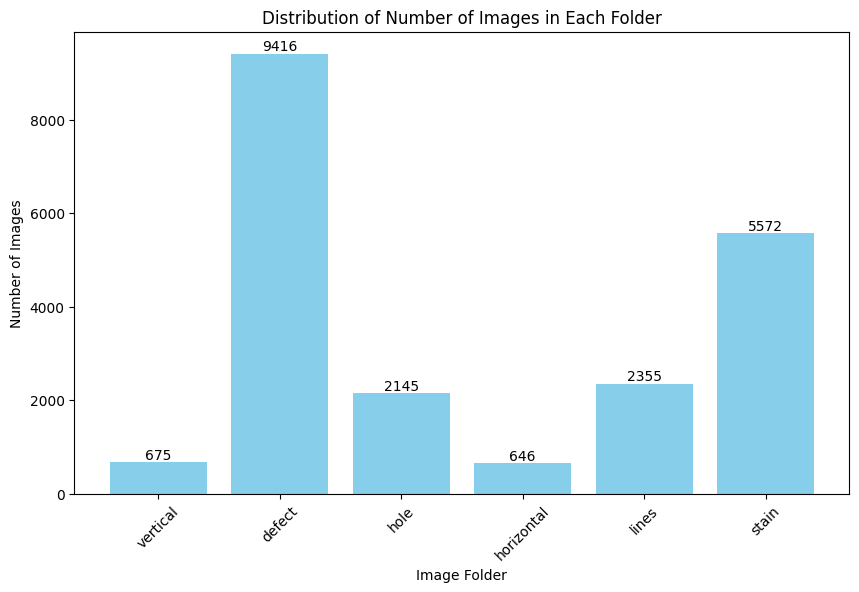

In [10]:
import os
import matplotlib.pyplot as plt

# Define the image folders
image_folders = {
    'vertical': '/kaggle/working/vertical_augmented/',
    'defect': '/kaggle/working/defect_augmented/',
    'hole': '/kaggle/working/hole_augmented/',
    'horizontal': '/kaggle/working/horizontal_augmented/',
    'lines': '/kaggle/working/lines_augmented/',
    'stain': '/kaggle/working/stain_augmented/',
}

# Function to count the number of images in a folder
def count_images_in_folder(folder_path):
    if not os.path.exists(folder_path):  # Check if folder exists
        print(f"⚠ Warning: Folder '{folder_path}' not found.")
        return 0
    return len([file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Get the number of images in each folder
image_counts = [count_images_in_folder(folder) for folder in image_folders.values()]

# Plot the distribution of the number of images inside each folder
plt.figure(figsize=(10, 6))
bars = plt.bar(image_folders.keys(), image_counts, color='skyblue')

plt.xlabel('Image Folder')
plt.ylabel('Number of Images')
plt.title('Distribution of Number of Images in Each Folder')
plt.xticks(rotation=45)

# Add text labels with the exact number of images above each bar
for bar, count in zip(bars, image_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom', fontsize=10)

plt.show()


In [11]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 15.1 MB/s eta 0:00:00


In [12]:
from ultralytics import YOLO

# Load YOLOv11 model (classification variant)
model = YOLO('yolo11s-cls.pt')  # Load the YOLOv11 small classification model

# Train the model on your dataset
model.train(
    task='classify',               # Specify the task as classification
    data='/kaggle/working/dataset',  # Path to dataset YAML file
    epochs=15,                    # Total number of epochs
    imgsz=64,                      # Image size,                  # Automatically determine batch size for GPU utilization
    save=True,                     # Enable saving of the trained model
    save_period=10,                # Save a checkpoint every 10 epochs
    cache='ram',                   # Cache dataset in RAM for faster training
    device=0,                      # Train on GPU 0 (or 'cpu' for CPU training)
    workers=8,                     # Number of worker threads for data loading
    pretrained=True,               # Use pretrained weights
    optimizer='AdamW',             # Use AdamW optimizer for better convergence
    lr0=0.001,                     # Initial learning rate for AdamW
    lrf=0.01,                      # Final learning rate as a fraction of the initial rate
    momentum=0.937,                # Momentum for SGD or beta1 for AdamW
    weight_decay=0.0005,           # Weight decay for regularization
    amp=True,                      # Enable Automatic Mixed Precision (AMP)
    warmup_epochs=3,               # Number of warmup epochs
    warmup_momentum=0.8,           # Initial momentum during warmup
    warmup_bias_lr=0.1,            # Learning rate for bias during warmup
    label_smoothing=0.1,           # Apply label smoothing
    rect=False,                    # Use rectangular training if aspect ratios vary greatly
    cos_lr=True,                   # Use cosine learning rate scheduler
    close_mosaic=10                # Disable mosaic augmentation in the last 10 epochs
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 13.0M/13.0M [00:00<00:00, 128MB/s]


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11s-cls.pt, data=/kaggle/working/dataset, epochs=15, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=10, cache=ram, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.6MB/s]


AMP: checks passed ✅
WARNING ⚠️ Classification `cache_ram` training has known memory leak in https://github.com/ultralytics/ultralytics/issues/9824, setting `cache_ram=False`.


train: Scanning /kaggle/working/dataset/train... 14564 images, 0 corrupt: 100%|██████████| 14564/14564 [00:42<00:00, 345.25it/s]


train: New cache created: /kaggle/working/dataset/train.cache
WARNING ⚠️ Classification `cache_ram` training has known memory leak in https://github.com/ultralytics/ultralytics/issues/9824, setting `cache_ram=False`.


val: Scanning /kaggle/working/dataset/val... 4161 images, 0 corrupt: 100%|██████████| 4161/4161 [00:12<00:00, 334.48it/s]

val: New cache created: /kaggle/working/dataset/val.cache


optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 4 dataloader workers
Logging results to runs/classify/train
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/15     0.254G      1.935         16         64:   1%|          | 5/911 [00:01<02:23,  6.32it/s]

       1/15     0.256G      1.676         16         64:   1%|          | 11/911 [00:01<01:21, 11.03it/s]
100%|██████████| 755k/755k [00:00<00:00, 20.2MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:11<00:00, 11.12it/s]

                   all      0.723          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:11<00:00, 11.33it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:11<00:00, 11.35it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:12<00:00, 10.70it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:12<00:00, 10.67it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:11<00:00, 11.46it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:11<00:00, 11.07it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:12<00:00, 10.91it/s]

                   all      0.874      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:12<00:00, 10.58it/s]

                   all      0.895          1



      Epoch    GPU_mem       loss  Instances       Size


      10/15     0.258G     0.3262          4         64: 100%|██████████| 911/911 [00:58<00:00, 15.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:12<00:00, 10.73it/s]

                   all      0.891          1



      Epoch    GPU_mem       loss  Instances       Size


      11/15     0.258G     0.3088          4         64: 100%|██████████| 911/911 [00:58<00:00, 15.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:11<00:00, 11.26it/s]

                   all      0.905          1



      Epoch    GPU_mem       loss  Instances       Size


      12/15     0.258G     0.2889          4         64: 100%|██████████| 911/911 [00:58<00:00, 15.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:11<00:00, 11.05it/s]

                   all      0.906          1



      Epoch    GPU_mem       loss  Instances       Size


      13/15     0.258G      0.281          4         64: 100%|██████████| 911/911 [00:58<00:00, 15.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:12<00:00, 10.77it/s]

                   all      0.911          1



      Epoch    GPU_mem       loss  Instances       Size


      14/15     0.258G     0.2828          4         64: 100%|██████████| 911/911 [00:59<00:00, 15.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:12<00:00, 10.82it/s]

                   all      0.912          1



      Epoch    GPU_mem       loss  Instances       Size


      15/15     0.258G     0.2731          4         64: 100%|██████████| 911/911 [00:58<00:00, 15.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:12<00:00, 10.66it/s]

                   all       0.91          1



15 epochs completed in 0.298 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 11.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 11.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-cls summary (fused): 47 layers, 5,441,814 parameters, 0 gradients, 12.0 GFLOPs
train: /kaggle/working/dataset/train... found 14564 images in 6 classes ✅ 
val: /kaggle/working/dataset/val... found 4161 images in 6 classes ✅ 
test: /kaggle/working/dataset/test... found 2084 images in 6 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [00:11<00:00, 11.01it/s]
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.912          1
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78f26a50d330>
curves: []
curves_results: []
fitness: 0.9561403393745422
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9122806787490845, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9561403393745422}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.010631973323034834, 'inference': 0.46818244436431894, 'loss': 0.0004178252812443547, 'postprocess': 0.0012574042306901388}
task: 'classify'
top1: 0.9122806787490845
top5: 1.0

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 1.0844250917434692. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 1.0673003196716309. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 1.00165593624115. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 1.0365142822265625. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 1.3926706314086914. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.1694118976593018. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.3262743949890137. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.0996952056884766. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be n

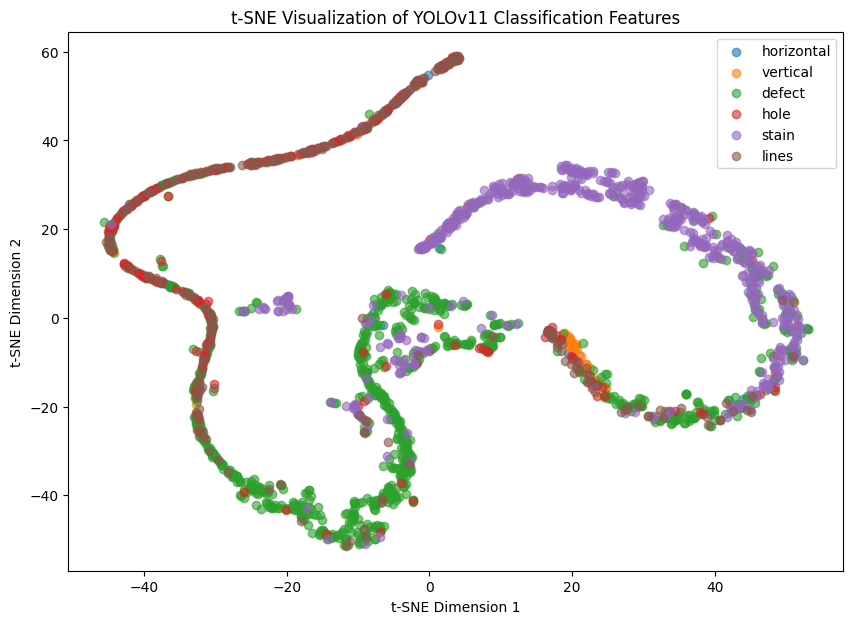

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from ultralytics import YOLO
from torchvision import transforms
from PIL import Image
import os

# Load trained YOLOv11 classification model
model = YOLO('runs/classify/train/weights/best.pt')  # Update with your trained model path

# Path to test dataset
data_path = "/kaggle/working/dataset/test"  # Update with your dataset path
classes = os.listdir(data_path)  # Get list of class folders
num_classes = len(classes)

# Data transformations (same as used during training)
transform = transforms.Compose([
    transforms.Resize((64, 64)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Lists to store extracted features and corresponding labels
features = []
labels = []

# Iterate through dataset to extract features
for class_idx, class_name in enumerate(classes):
    class_folder = os.path.join(data_path, class_name)
    
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        image = Image.open(img_path).convert("RGB")
        image = transform(image)
        image = image.unsqueeze(0).to('cuda')  # Move to GPU if available
        
        # Extract features (classification probabilities)
        with torch.no_grad():
            result = model(image, verbose=False)[0]  # Get Results object
            if result.probs is not None:
                feature_vector = result.probs.data.cpu().numpy().flatten()  # Convert to NumPy array
                features.append(feature_vector)
                labels.append(class_idx)

# Convert lists to NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_2d = tsne.fit_transform(features)

# Plot t-SNE results
plt.figure(figsize=(10, 7))
for class_idx in range(num_classes):
    idxs = labels == class_idx
    plt.scatter(features_2d[idxs, 0], features_2d[idxs, 1], label=classes[class_idx], alpha=0.6)

plt.title("t-SNE Visualization of YOLOv11 Classification Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


In [14]:
import os
print(os.path.exists('/kaggle/working/runs/classify/train/weights/best.pt'))


True


In [15]:
import os
print(os.listdir('/kaggle/working/runs/classify/train/weights/'))


['last.pt', 'best.pt', 'epoch0.pt', 'epoch10.pt']


In [16]:
import shutil
shutil.copy('/kaggle/working/runs/classify/train/weights/best.pt', '/kaggle/working/best.pt')


'/kaggle/working/best.pt'

In [17]:
!zip -r best_weights.zip /kaggle/working/runs/classify/train/weights/best.pt

from IPython.display import FileLink
FileLink('best_weights.zip')


  adding: kaggle/working/runs/classify/train/weights/best.pt (deflated 8%)


/kaggle/working/best_weights.zip